<h1 align = center> FINAL PROJECT </h1>
<h4> OPENING A LATIN RESTAURANT IN VANCOUVER </h4>
<h4> CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS </h4>
<h4> BY DIANA MOJICA </h4>
 
<p> INTRODUCTION </p>

<p> 1.1. Background </p>

<p> Vancouver has been recognized as one of the 5 best cities in the world to work, live and study. This fact is due to order, security, cleanliness and the enormous cultural offer for both locals and foreigners.
    
Without a doubt, it is one of the most attractive cities for latin people who seek to emigrate or carry out some type of study abroad.
    
According to official censuses, approximately 500,000 latin people live in Vancouver and the number of students each year is increasing. <p>

<p> 1.2. Problem Description</p>

<p> One of the things that are most missed when emigrating is the food, so with this project we will seek to analyze a series of data that will allow us to make a recommendation about the place where it would be a good decision to open a new Latin restaurant. </p>
    
<p> For this, some of the techniques, libraries and applications learned throughout this course will be used. </p>
    
<h4>The goal will be to answer the following questions: </h4

 - In which area of Vancouver are there more restaurants?
 - What is the recommended area? </p>

<p>
1.3. Target Audience

- People looking to open new restaurants
- Restaurants
- Latin people live and studying in Vancouver
</p>

<p>
    2. DATA

The data will be generated and extracted like this:
-	List of postal codes of Vancouver, the information will be read and prepared to create a dataframe with the necessary columns ['PostalCode', 'Borough', 'Neighborhood']. Source:
 https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V  

-	Get the Longitude and Latitude of each Vancouver postal code. Create new dataframe.

-	Using Foursquare API get the restaurant’s number and their type and location.

    </p>
    
 <p>
3. Methodology

- Use the Vancouver zip code list. Available at the link:
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V  
- Analyze the number of Latino restaurants by area in Vancouver.
- Filter restaurants and group by type Latin Restaurant
- View the restaurants in Latin classification by area.


</p>

<h4> Libraries which are used to develope this project </h4>

In [2]:
# import libraries

import pandas as pd 
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen


import json
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans


!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [3]:
!pip install lxml

In [4]:
!pip install bs4


<h3> Scrap and get the data from the web </h3>

In [5]:
 #  After retreiving the URL and creating a Beautiful soup object

data = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V').text

bf = BeautifulSoup(data, 'lxml')

print('Data downloaded!')

Data downloaded!


In [6]:
#Firstly create a list

data = []

#Later after finding the table and table data  create a dictionary called cell having 3 keys PostalCode, Borough and Neighborhood.

table = bf.find('table')
table2 = table.find('tbody')

rows = table2.find_all('tr')
for row in rows: #[-1:]:
    cells = row.find_all("td")
    for cell in cells:
        PostalCode = cell.b.text
        try:
    
            Borough = cell.i.text
        except: 
            
            try:
                Borough = cell.a.text
            except:
                Borough = cell.span.text
            s = cell.span.text
            
            Neighborhood = s[s.find("(")+1:s.find(" /")]
        if Borough != 'Not assigned':
            
# Append to the list
            data.append((PostalCode, Borough, Neighborhood))

In [7]:
# **Create a dataframe with list**
df = pd.DataFrame(data)
df.columns = ['PostalCode', 'Borough', 'Neighborhood']


In [8]:
data

[('V1A', 'Kimberley', 'Kimberle'),
 ('V2A', 'Penticton', 'Penticto'),
 ('V3A', 'Langley Township', 'Langley City'),
 ('V4A', 'Surrey', 'SurreySouthwes'),
 ('V5A', 'Burnaby', 'Government Road'),
 ('V6A', 'Vancouver', 'Strathcona'),
 ('V7A', 'Richmond', 'RichmondSout'),
 ('V8A', 'Powell River', 'Powell Rive'),
 ('V9A', 'Canadian Forces(MARPAC)', 'Powell Rive'),
 ('V1B', 'Vernon', 'VernonEas'),
 ('V2B', 'Kamloops', 'KamloopsNorthwes'),
 ('V3B', 'Port Coquitlam', 'Port CoquitlamCentra'),
 ('V4B', 'White Rock', 'White Roc'),
 ('V5B', 'Burnaby', 'Parkcrest-Aubrey'),
 ('V6B', 'Vancouver', 'NE Downtown'),
 ('V7B', 'Richmond', 'Sea Island'),
 ('V8B', 'Squamish', 'Squamis'),
 ('V9B', 'Victoria', 'West Highlands'),
 ('V1C', 'Cranbrook', 'Cranbroo'),
 ('V2C', 'Kamloops', 'KamloopsCentral and Southeas'),
 ('V3C', 'Port Coquitlam', 'Port CoquitlamSout'),
 ('V4C', 'Delta', 'DeltaNortheas'),
 ('V5C', 'Burnaby', 'Burnaby Heights'),
 ('V6C', 'Vancouver', 'Waterfront'),
 ('V7C', 'Richmond', 'RichmondNort

In [9]:
df.shape

(175, 3)

In [90]:
#checking that zip codes are correct

address = 'V6A'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

49.27325401999999 -123.09982347086994


In [122]:

body = client_060ee4cb33204488a20ef61dd78a127a.get_object(Bucket='courseracapstone-donotdelete-pr-o4zj0pjpz43ixw',Key='neig_vancouver.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

neighborhood = pd.read_csv(body)
neighborhood.head(30)


,Neighborhood
0,Strathcona
1,NE Downtown
2,Waterfront
3,SE West End
4,NW West End
5,West Fairview
6,North Hastings-Sunrise
7,Central Kitsilano
8,North Grandview-Woodland
9,NW Arbutus Ridge


<h3> Getting the latitude and longitude of each Neighborhood of Vancouver </h3>

In [123]:
neighborhood.rename(columns={' Neighborhood': 'Neighborhood'}, inplace=True)

In [124]:
# Create empty array for latitude and longitude.
latitude, longitude = [], []

for i in range(len(neighborhood)):
    
    geolocator = Nominatim(user_agent="foursquare_agent")
    g = geolocator.geocode('{}, Vancouver, Canada'.format(neighborhood['Neighborhood'][i]))

    # write latitude and longitude value into the latitude and longitude arrays 
    latitude.append(g.latitude)
    longitude.append(g.longitude)
    print(i)
print('completed')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
completed


In [127]:
# Add in the latitude and longitude into neighborhood dataframe.
neighborhood['Latitude'] = latitude
neighborhood['Longitude'] = longitude
neighborhood

,Neighborhood,Latitude,Longitude
0,Strathcona,49.277693,-123.088539
1,NE Downtown,49.287469,-123.119579
2,Waterfront,49.285544,-123.113541
3,SE West End,49.285998,-123.127358
4,NW West End,49.284131,-123.131795
5,West Fairview,49.263476,-123.115243
6,North Hastings-Sunrise,49.278714,-123.039998
7,Central Kitsilano,49.269410,-123.155267
8,North Grandview-Woodland,49.275849,-123.066934
9,NW Arbutus Ridge,49.246305,-123.159636


In [134]:
df_new = neighborhood.merge(df, on="Neighborhood", how="left")
df_new.shape

(28, 5)

<h3> Creating the vancouver map with the zip codes found </h3>

In [135]:
address = 'Vancouver, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

49.2608724 -123.1139529


In [136]:
new_map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, borough, neighborhood in zip(df_new['Latitude'], df_new['Longitude'], df_new['Borough'], df_new['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
     
    if lat == latitude and lng == longitude:
        color = 'red'
    else:
        color = 'blue'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3198cc',
        fill_opacity=0.5).add_to(new_map_vancouver)  
    
new_map_vancouver


<h3> Foursquare to find the venues of Vancouver </h3>

In [137]:
CLIENT_ID = 'RVU3VTRAL20BJNWP5Q11INDLB52NMEXIAYSTK0Z33FK4FBTT' # your Foursquare ID
CLIENT_SECRET = 'WEFPNKEPG3CU5J2DKLJIDPJ3KXUBQAZ51J5YVBTGSJNJQ1UO' # your Foursquare Secret
ACCESS_TOKEN = 'LFGIXOBLPAEOYPXLGRAKKRNDEELJZ5PW3Z5N045MB2ROUOGD' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails loaded')
print('CLIENT_ID loaded' )
print('CLIENT_SECRET loaded' )

Your credentails loaded
CLIENT_ID loaded
CLIENT_SECRET loaded


In [91]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=RVU3VTRAL20BJNWP5Q11INDLB52NMEXIAYSTK0Z33FK4FBTT&client_secret=WEFPNKEPG3CU5J2DKLJIDPJ3KXUBQAZ51J5YVBTGSJNJQ1UO&v=20180604&ll=49.27325401999999,-123.09982347086994&radius=500&limit=100'

In [140]:
LIMIT = 100 
radius = 500

In [141]:
def GetNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [143]:
vancouver_venues = GetNearbyVenues(names = df_new['Neighborhood'], 
                                   latitudes = df_new['Latitude'], 
                                   longitudes = df_new['Longitude'], radius = radius)

Strathcona
NE Downtown
Waterfront
SE West End
NW West End
West Fairview
North Hastings-Sunrise
Central Kitsilano
North Grandview-Woodland
NW Arbutus Ridge
South Hastings-Sunrise
South Grandview-Woodland
West Kerrisdale
SE Kensington-Cedar Cottage
SE Kerrisdale
South Renfrew-Collingwood
West Kitsilano
Killarney
East Mount Pleasant
UBC
West Kensington-Cedar Cottage
SE Riley Park-Little Mountain
SE Oakridge
Bentall Centre
West Mount Pleasant
Pacific Centre
East Fairview
SW Downtown


In [144]:
# Let's check the size of the resulting dataframe
print(vancouver_venues.shape)
vancouver_venues.head()

(928, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Strathcona,49.277693,-123.088539,Union Market,49.277371,-123.086989,Deli / Bodega
1,Strathcona,49.277693,-123.088539,Strathcona Park,49.275183,-123.084919,Park
2,Strathcona,49.277693,-123.088539,The Juice Truck,49.281281,-123.092120,Food Truck
3,Strathcona,49.277693,-123.088539,Wilder Snail,49.279346,-123.087338,Coffee Shop
4,Strathcona,49.277693,-123.088539,Strathcona Beer Company,49.281294,-123.085111,Brewery


In [145]:
vancouver_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bentall Centre,69,69,69,69,69,69
Central Kitsilano,52,52,52,52,52,52
East Fairview,55,55,55,55,55,55
East Mount Pleasant,57,57,57,57,57,57
Killarney,19,19,19,19,19,19
NE Downtown,50,50,50,50,50,50
NW Arbutus Ridge,9,9,9,9,9,9
NW West End,55,55,55,55,55,55
North Grandview-Woodland,35,35,35,35,35,35


In [146]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(vancouver_venues['Venue Category'].unique())))

There are 160 uniques categories.


<h3> Analyze Each Neighborhood </h3> 

In [149]:
# one hot encoding
vancouver_onehot = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vancouver_onehot['Neighborhood'] = vancouver_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]


In [151]:
vancouver_grouped = vancouver_onehot.groupby('Neighborhood').mean().reset_index()

# Create a dataframe for all the restaurant in Vancouver.
vancouver_restaurant = pd.DataFrame({'Vancouver Restaurant' : vancouver_grouped.columns[1:][vancouver_grouped.columns[1:].str.contains("Restaurant")]})
vancouver_restaurant


,Vancouver Restaurant
0,American Restaurant
1,Asian Restaurant
2,Brazilian Restaurant
3,Cajun / Creole Restaurant
4,Cantonese Restaurant
5,Chinese Restaurant
6,Cuban Restaurant
7,Dim Sum Restaurant
8,Ethiopian Restaurant
9,Falafel Restaurant


<h3> Grouping the categories related to Latin Restuarant </h3>

In [153]:
vancouver_grouped = vancouver_grouped[['Neighborhood','Mexican Restaurant', 'Brazilian Restaurant', 'Cuban Restaurant']]

In [154]:
vancouver_grouped['Latin Restaurant'] = vancouver_grouped['Mexican Restaurant'] + vancouver_grouped['Brazilian Restaurant'] + vancouver_grouped['Cuban Restaurant']
vancouver_grouped.drop(['Mexican Restaurant', 'Brazilian Restaurant', 'Cuban Restaurant'], axis=1, inplace=True)
vancouver_grouped

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Latin Restaurant
0,Bentall Centre,0.000000
1,Central Kitsilano,0.019231
2,East Fairview,0.000000
3,East Mount Pleasant,0.000000
4,Killarney,0.000000
5,NE Downtown,0.000000
6,NW Arbutus Ridge,0.000000
7,NW West End,0.018182
8,North Grandview-Woodland,0.028571
9,North Hastings-Sunrise,0.000000


In [157]:
#add new column
df_new = df_new.merge(vancouver_grouped, on="Neighborhood", how="left")
df_new.head(30)

,Neighborhood,Latitude,Longitude,PostalCode,Borough,Latin Restaurant_x,Latin Restaurant_y
0,Strathcona,49.277693,-123.088539,V6A,Vancouver,0.000000,0.000000
1,NE Downtown,49.287469,-123.119579,V6B,Vancouver,0.000000,0.000000
2,Waterfront,49.285544,-123.113541,V6C,Vancouver,0.000000,0.000000
3,SE West End,49.285998,-123.127358,V6E,Vancouver,0.000000,0.000000
4,NW West End,49.284131,-123.131795,V6G,Vancouver,0.018182,0.018182
5,West Fairview,49.263476,-123.115243,V6H,Vancouver,0.000000,0.000000
6,North Hastings-Sunrise,49.278714,-123.039998,V5K,Vancouver,0.000000,0.000000
7,Central Kitsilano,49.269410,-123.155267,V6K,Vancouver,0.019231,0.019231
8,North Grandview-Woodland,49.275849,-123.066934,V5L,Vancouver,0.028571,0.028571
9,NW Arbutus Ridge,49.246305,-123.159636,V6L,Vancouver,0.000000,0.000000


<h3> Analysis each Neighborhood by visualization </h3>

In [162]:
import matplotlib.pyplot as plt

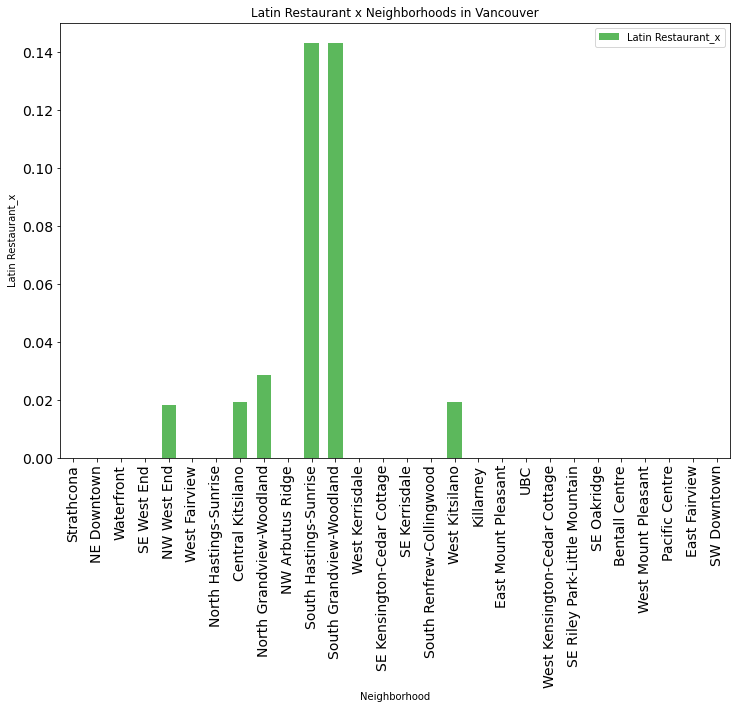

In [163]:
latin_restaurant_chart = df_new[['Neighborhood', 'Latin Restaurant_x']].copy()
top_chart = latin_restaurant_chart.head(30)
top_chart.set_index('Neighborhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Latin Restaurant_x') # add y-label to the plot
plt.title('Latin Restaurant x Neighborhoods in Vancouver') # add title to the plot

plt.show()

<h3> Conclusions </h3>

<p> This project was carried out in the city of Vancouver, allowing us to observe that the number of Latino restaurants in Vancouver is very low and in only 6 areas out of 27 these types of restaurants appear.

It is a good start to determine if it is really profitable to open this type of restaurant.

On the question of the project, it can be said that the best areas for the opening of the Latin restaurant would be in South Hastings-Sunrise or South Grandview-Woodland.

</p>